In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import os
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

In [2]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams.update({'font.size': 20})

In [3]:
def stateThresholds():
    return {'mz':[179.928,592.86]
            ,'u':[4322.72,15365.41],
            'h':[126.85,381.53],
            'A':[163.02,385.53]}

#### Metabolic Phenotypes

{'A': 436.47213160474945, 'Rnox': 1.6461845679152642, 'Rmt': 128.97826781691597, 'h': 26.69259410719074}

{'A': 385.53355124455993, 'Rnox': 2.857316799224224, 'Rmt': 137.55212530487026, 'h': 126.85433451255018}

{'A': 327.50827624867554, 'Rnox': 8.970170738431756, 'Rmt': 138.2393863317781, 'h': 292.59779290727334}

{'A': 163.0219643626051, 'Rnox': 21.429749060524145, 'Rmt': 54.95997630766442, 'h': 381.53445469342324} 

{'A': 68.67768314578954, 'Rnox': 30.525042671185414, 'Rmt': 8.353361802666083, 'h': 480.4124463778733} 



#### EMT phenotypes

'u': 1265.0145554683656, 'ms': 451.1540645013371, 'u3': 8177.938943062448, 'mz': 990.4010240761947},

'u': 4322.718712975423, 'ms': 457.2059660505549, 'u3': 14831.841141418037, 'mz': 592.8640392330298},

'u': 12389.217608300634, 'ms': 458.4642670196209, 'u3': 16908.617669803563, 'mz': 301.84367817798204}, 

'u': 15365.410894097318, 'ms': 458.5016342609288, 'u3': 16975.501915824585, 'mz': 179.92788317173316})

'u': 19098.53802971536, 'ms': 458.5115606841859, 'u3': 16993.323702636688, 'mz': 62.206071606052106},


In [4]:
def getStates(df_res,thresh):
            
    E = (df_res['u']>thresh['u'][1])*(df_res['mz']<=thresh['mz'][0])
    M = (df_res['u']<=thresh['u'][0])*(df_res['mz']>thresh['mz'][1])
    EM =(df_res['u']>thresh['u'][0])*(df_res['u']<=thresh['u'][1])*(df_res['mz']>thresh['mz'][0])*(df_res['mz']<=thresh['mz'][1])
    
    
    O = (df_res['A']>thresh['A'][1])*(df_res['h']<=thresh['h'][0])
    W = (df_res['A']<=thresh['A'][0])*(df_res['h']>thresh['h'][1])
    WO =(df_res['A']>thresh['A'][0])*(df_res['A']<=thresh['A'][1])*(df_res['h']>thresh['h'][0])*(df_res['h']<=thresh['h'][1])
    
    results={'E/O':np.sum(E*O),'E/WO':np.sum(E*WO),'E/W':np.sum(E*W),
             'M/O':np.sum(M*O),'M/WO':np.sum(M*WO),'M/W':np.sum(M*W),
             'EM/O':np.sum(EM*O),'EM/WO':np.sum(EM*WO),'EM/W':np.sum(EM*W),
             'E':np.sum(E),'EM':np.sum(EM),'M':np.sum(M),
             'O':np.sum(O),'WO':np.sum(WO),'W':np.sum(W)}
    
    maxV = np.max(results.values())
    return results,maxV

In [5]:
def plotValuesEMTvMR(df,thresholds,overlay=True):
    if len(df)<990:
        return
    else:
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,11))
        plt.subplots_adjust(hspace=0.2,wspace=0.5)

        labels={"u":"$\mu_{200}$",'mz':'Zeb mNRA','A':'AMPK','h':'Hif-1'}
        x1L = 'u'
        x2L = 'A'
        y1L='h'
        y2L='mz'

        if overlay:
            df_comp =pd.read_csv("../coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt").dropna()
            ax1.plot(df_comp[x1L].values,df_comp[y1L].values,"ro",markersize=10)
            ax2.plot(df_comp[x2L].values,df_comp[y2L].values,"ro",markersize=10)

        ax1.plot(df[x1L].values,df[y1L].values,"ko",markersize=10)
        ax2.plot(df[x2L].values,df[y2L].values,"ko",markersize=10)

        x1v=np.arange(0,20000)
        x2v=np.arange(0,600)
        y1v=np.arange(0,600)
        y2v=np.arange(0,1200)
        y1a= thresholds[y1L][0]
        y1b= thresholds[y1L][1]
        x1a= thresholds[x1L][0]
        x1b= thresholds[x1L][1]

        y2a= thresholds[y2L][0]
        y2b=thresholds[y2L][1]
        x2a= thresholds[x2L][0]
        x2b= thresholds[x2L][1]

        ax1.fill_between(x1v,y1a, y1b,facecolor='red',alpha=0.4)#
        ax1.fill_betweenx(y1v,x1a, x1b,facecolor='blue',alpha=0.4)#
        ax1.set_xlabel(labels[x1L])
        ax1.set_ylabel(labels[y1L])

        ax2.fill_between(x2v,y2a, y2b,facecolor='red',alpha=0.4)#
        ax2.fill_betweenx(y2v,x2a, x2b,facecolor='blue',alpha=0.4)#
        ax2.set_xlabel(labels[x2L])
        ax2.set_ylabel(labels[y2L])

        #ax1.set_xlim(np.min(x1v),np.max(x1v))
        #ax1.set_ylim(np.min(y1v),np.max(y1v))
        #ax2.set_xlim(np.min(x2v),np.max(x2v))
        #ax2.set_ylim(np.min(y2v),np.max(y2v))

        plt.text(.1, 1.05 , 'M', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(.35, 1.05 , 'EM', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(.7, 1.05 , 'E', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(1.05,.8, 'M', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
        plt.text(1.05,.4, 'EM', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
        plt.text(1.05,.1, 'E', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)


        plt.text(1.05,.8, 'W', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(1.05,.5, 'WO', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(1.05,.1, 'O', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(.2, 1.05 , 'W', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
        plt.text(.55, 1.05 , 'WO', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
        plt.text(.85, 1.05 , 'O', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)

        plt.show()


## set 1

li=[1.,1.,1.,]

ymih=[0,0,0]

yuih=[0,0,0]


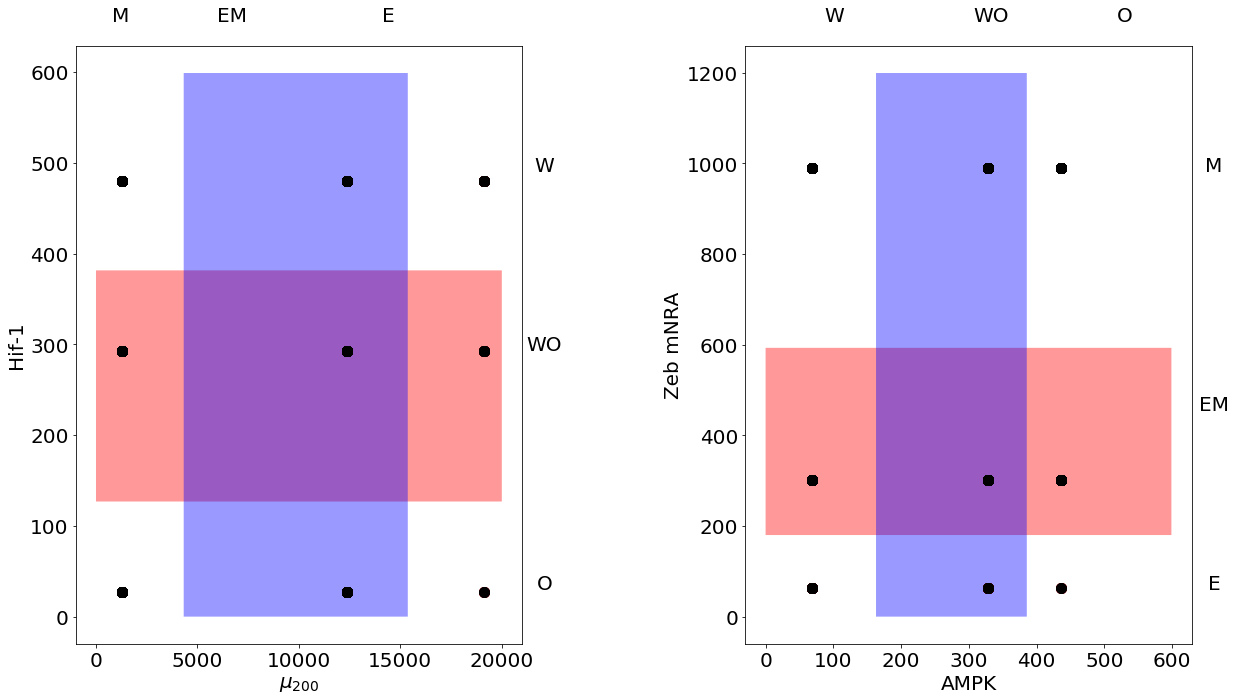

In [7]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set1__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 2

li=[1.,1.,1.,]

ymih=[0,0.1,0.2]

yuih=[0,0,0]


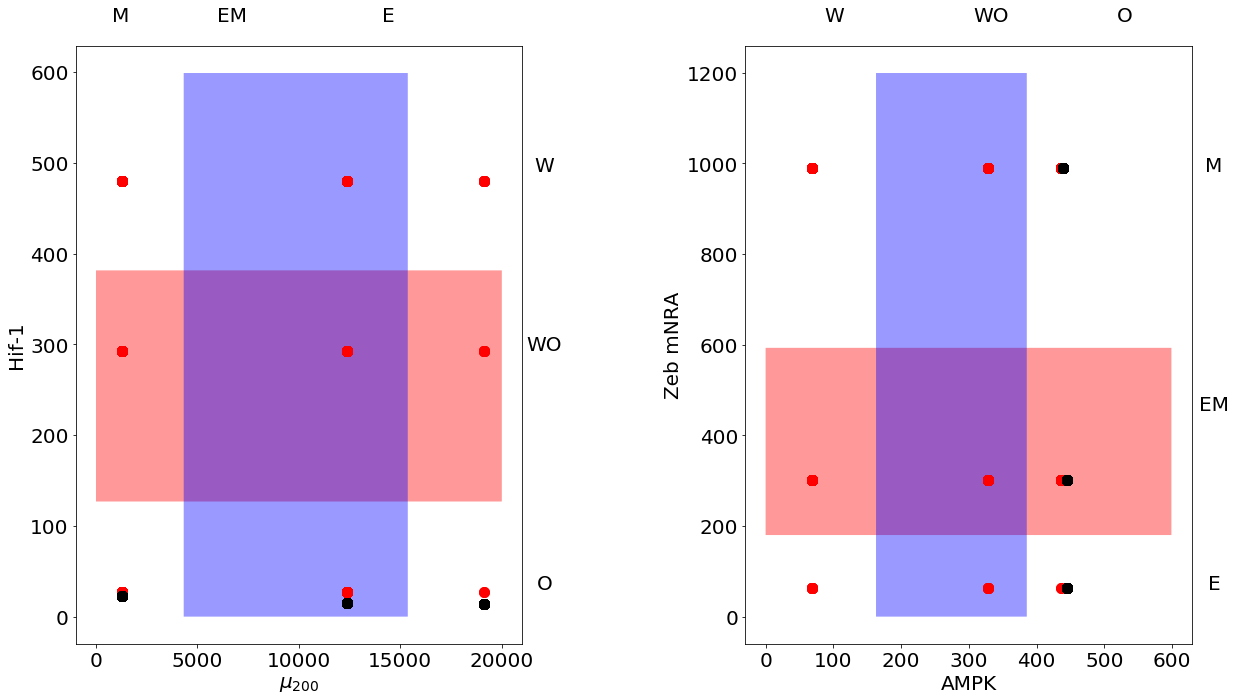

In [8]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set2__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 3

li=[1.,1.,1.,]

ymih=[0,0,0]

yuih=[0,0.1,0.2]


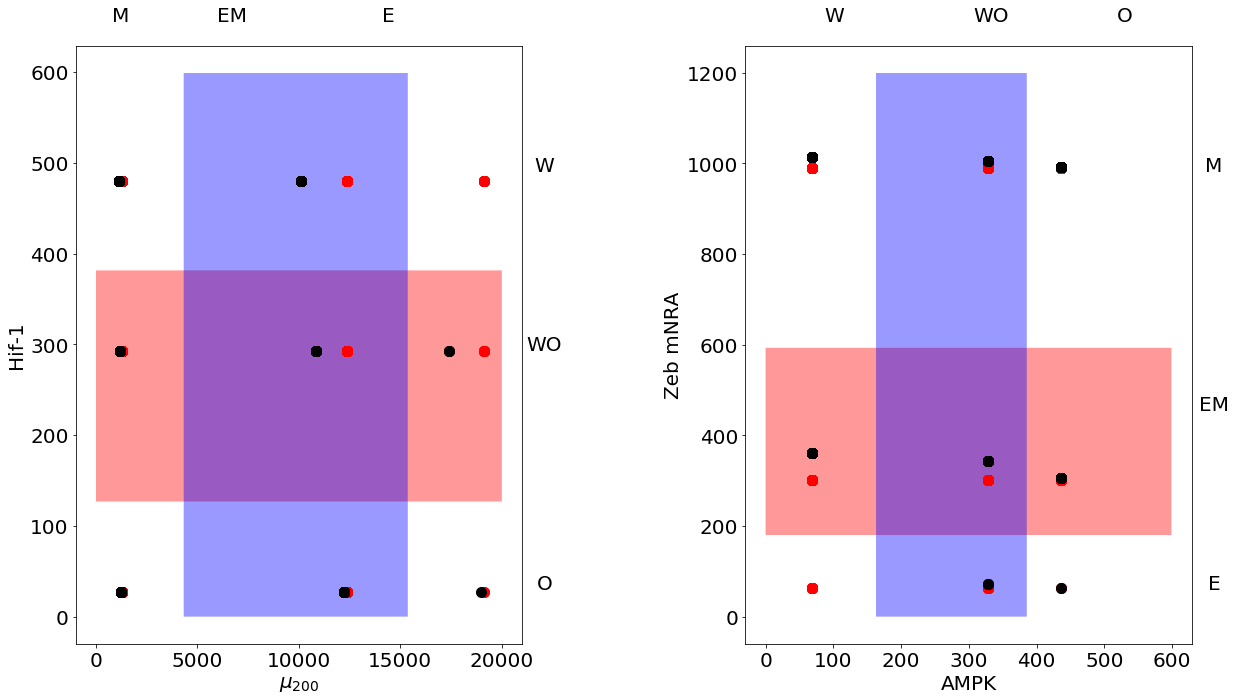

In [9]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set3__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 4

li=[1.,1.,1.,]

ymih=[0,0.01,0.02]

yuih=[0,0,0]


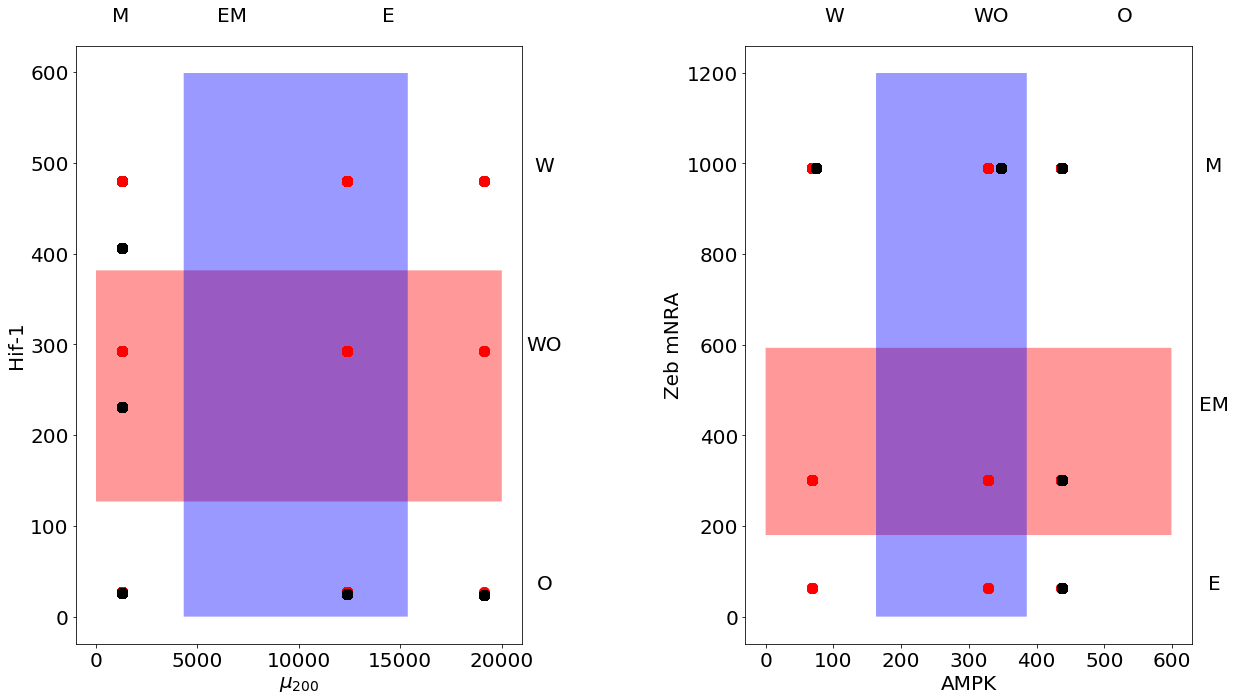

In [10]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set4__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 5

li=[1.,1.,1.,]

ymih=[0,0,0]

yuih=[0,0.01,0.02]


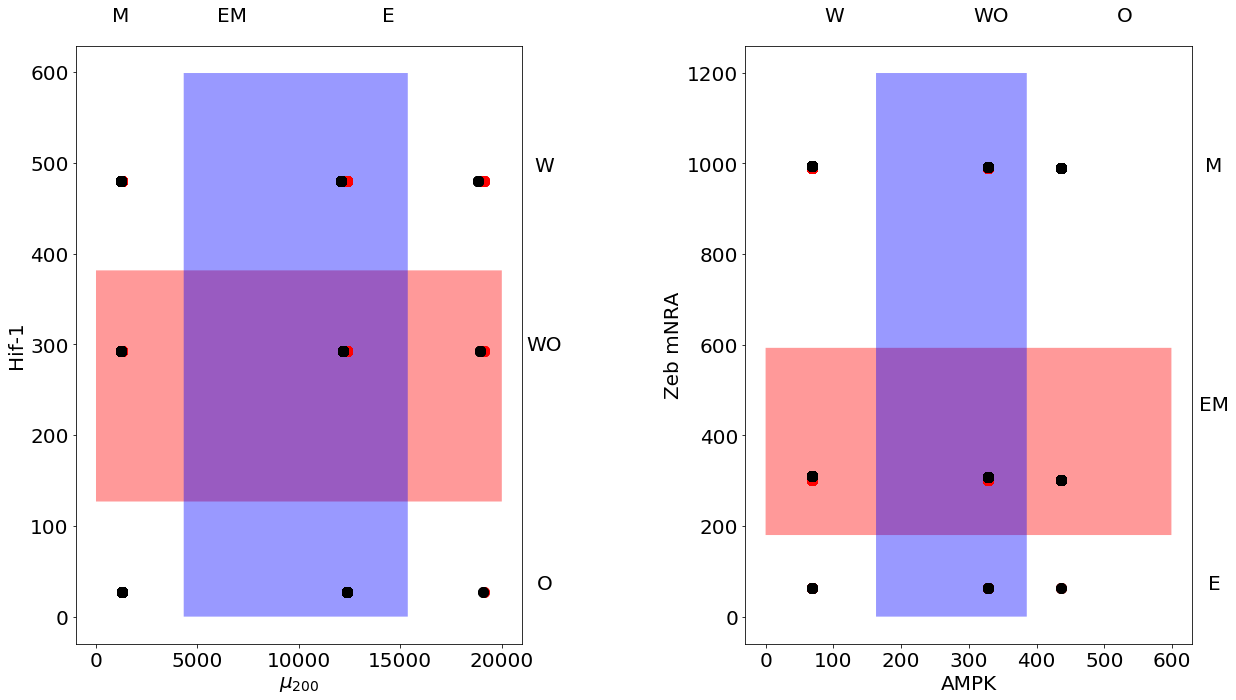

In [11]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set5__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 6

li=[1.,1.,1.,]

ymih=[0,0.001,0.002]

yuih=[0,0,0]


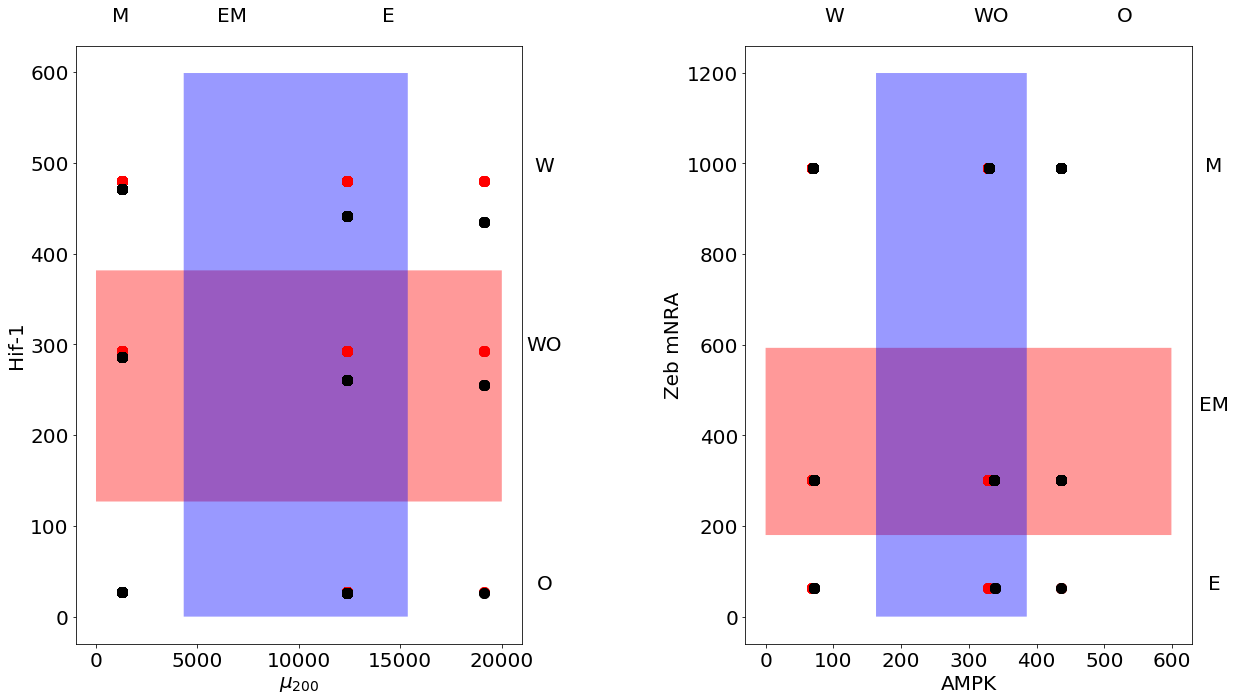

In [12]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set6__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 7

li=[1.,1.,1.,]

ymih=[0,0.003,0.005]

yuih=[0,0,0]


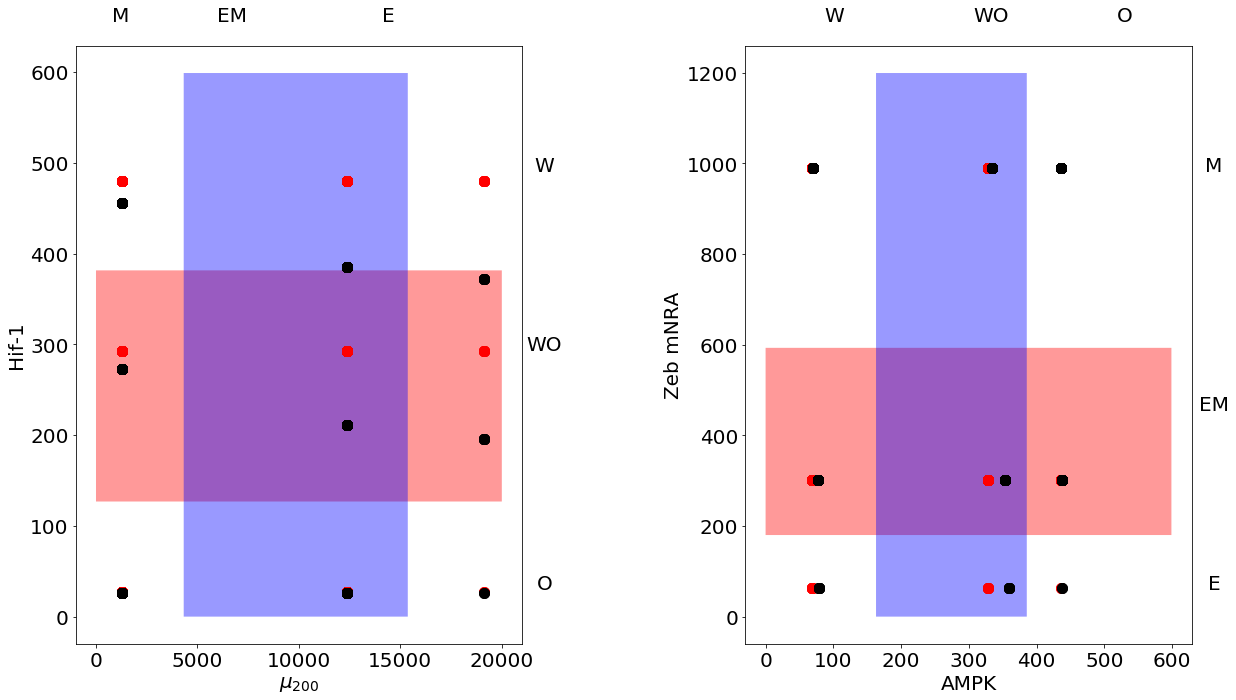

In [13]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set7__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 8

li=[1.,1.,1.,]

ymih=[0,0.005,0.01]

yuih=[0,0,0]


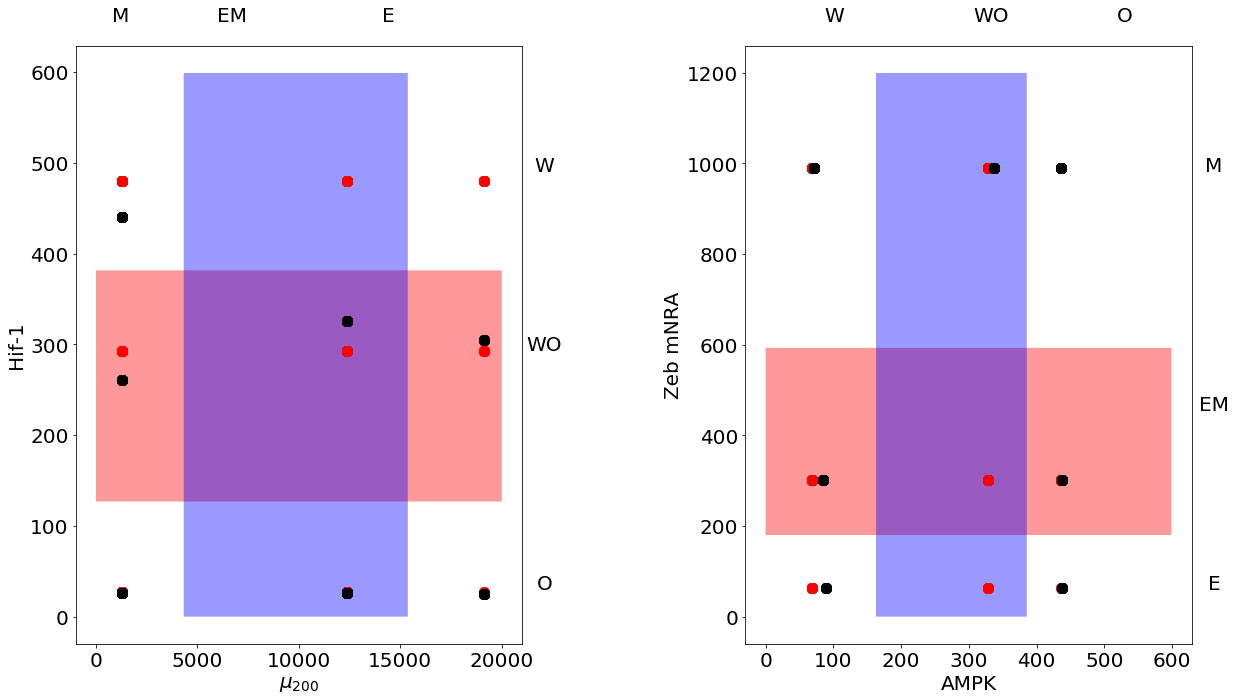

In [14]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set8__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 9

li=[1.,1.,1.,]

ymih=[0,0.003,0.005]

yuih=[0,0.1,0.2]


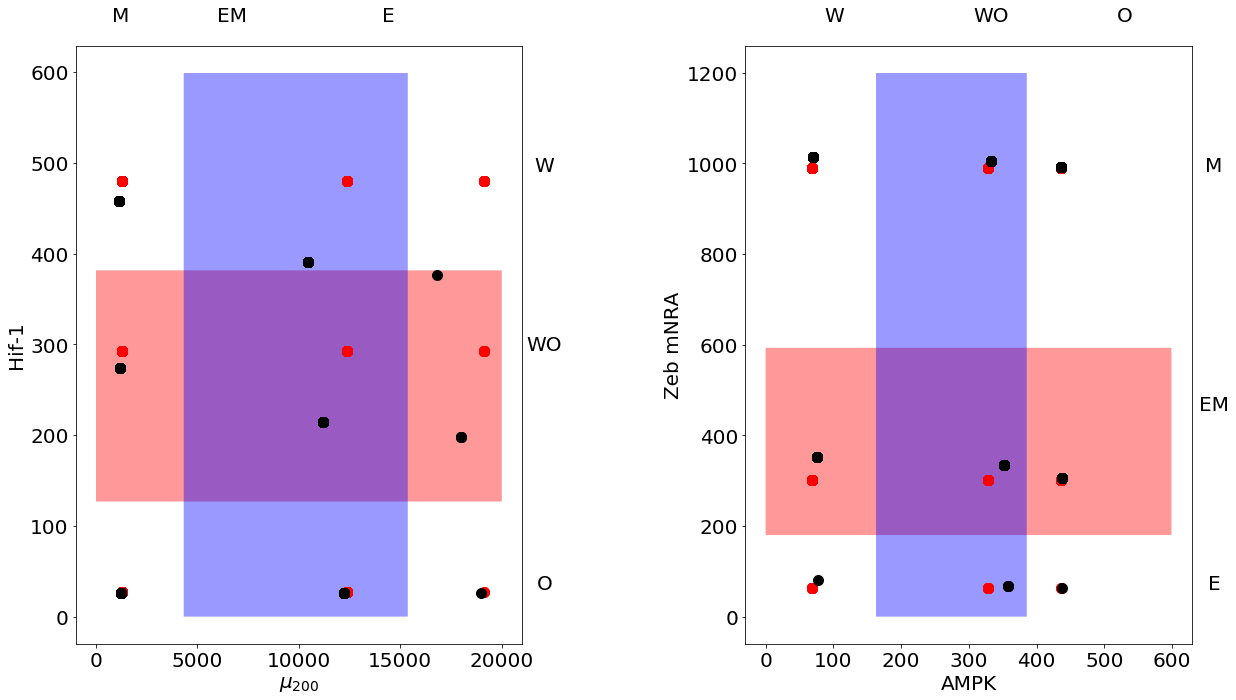

In [15]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set9__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 10

li=[1.,1.,1.,]

ymih=[0,0.003,0.005]

yuih=[0,0.5,1.]


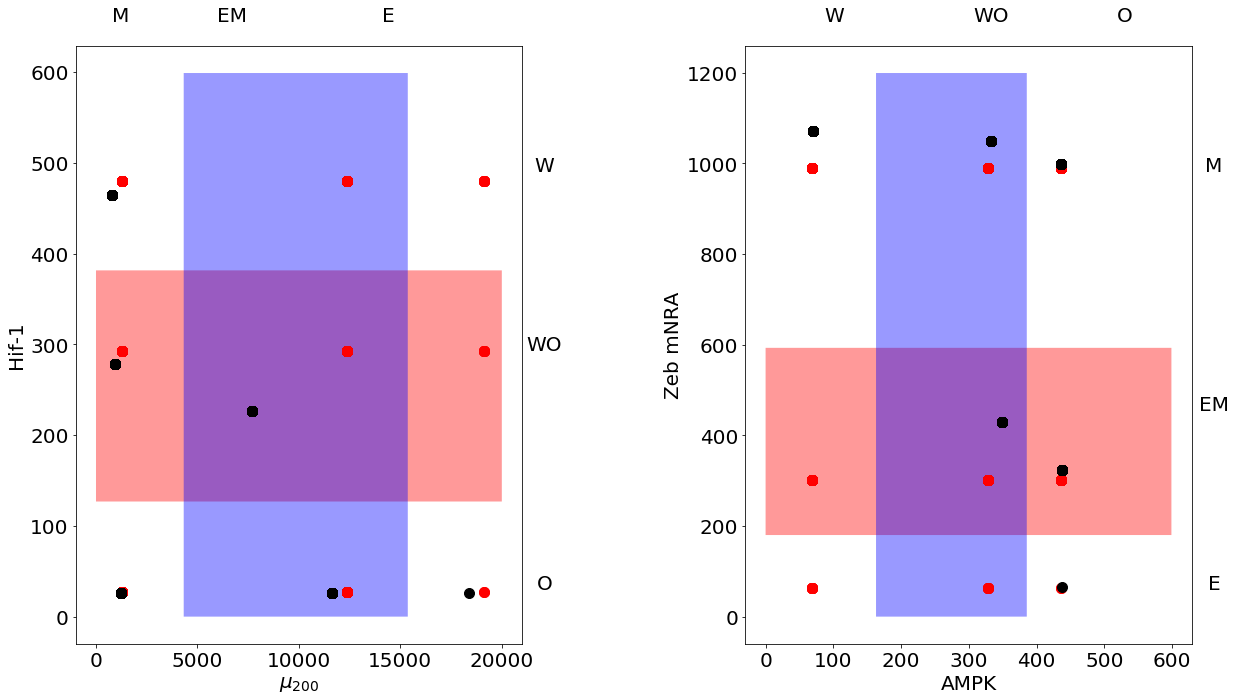

In [16]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set10__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

In [30]:
df = pd.read_csv("data/singles_crosstalk_uh10.txt")

In [31]:
y = df['O'].values+df['WO'].values*2+df['W'].values*3

In [32]:
y

array([1, 1, 1, ..., 1, 1, 1])

10
1000


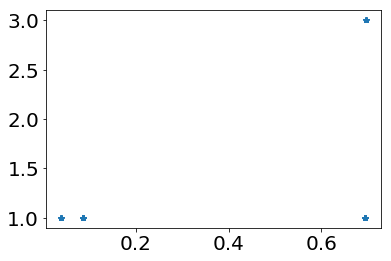

0.03926181485851328 [1]
0.08629772394072648 [1]
0.6953409614359972 [1]
0.6957826137303134 [3]




20
1000


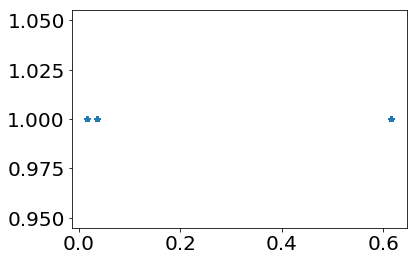

0.015801232440946455 [1]
0.03626897431369034 [1]
0.6158238413977795 [1]




21
1000


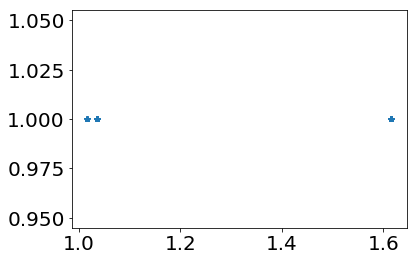

1.0158324035956003 [1]
1.0364103525329649 [1]
1.6161442528984002 [1]




30
1000


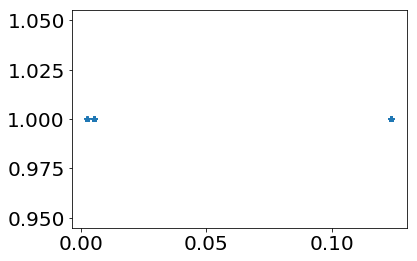

0.002433984465199665 [1]
0.005208298260005993 [1]
0.12376339080648273 [1]




31
1000


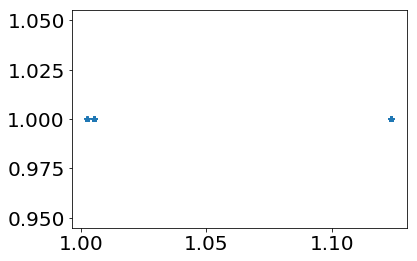

1.0024345508283932 [1]
1.0052106687766724 [1]
1.1237955466818137 [1]




32
1000


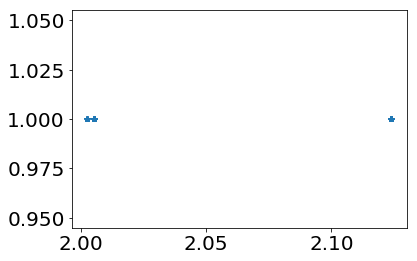

2.0024355897475976 [1]
2.005215571058863 [1]
2.123969349019648 [1]




33
1000


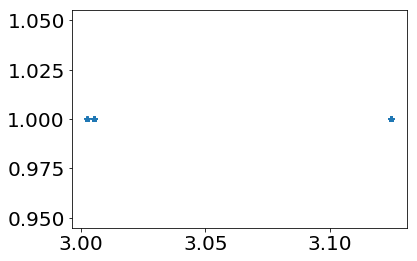

3.0024422843435032 [1]
3.0052456097338704 [1]
3.1248115951332416 [1]




110
1000


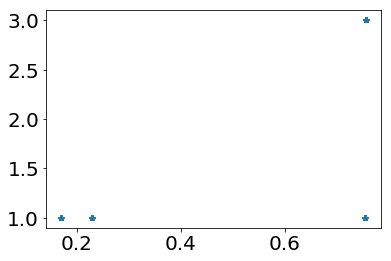

0.1701184228699658 [1]
0.2298155240383817 [1]
0.7547865668561679 [1]
0.7551487561726546 [3]




120
1000


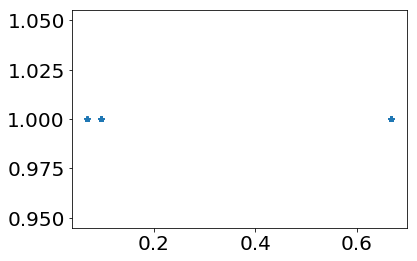

0.06847982252057401 [1]
0.09660982212115987 [1]
0.6684718137514015 [1]




121
1000


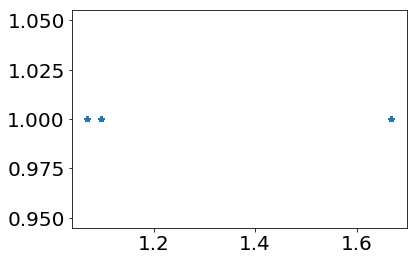

1.068528105525618 [1]
1.0967893688305541 [1]
1.6687614281540903 [1]




130
1000


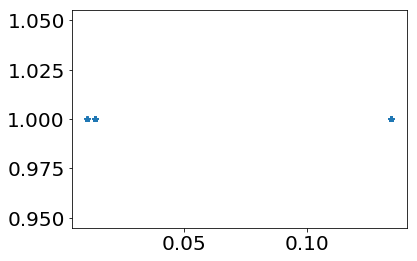

0.010549760139547582 [1]
0.013876119251438229 [1]
0.13434514000612924 [1]




131
1000


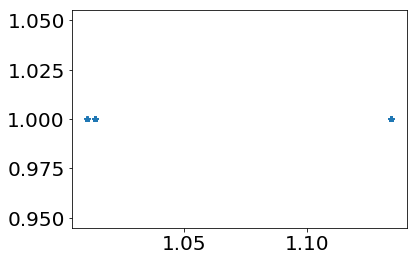

1.0105504803271432 [1]
1.0138788503546237 [1]
1.1343771361227484 [1]




132
1000


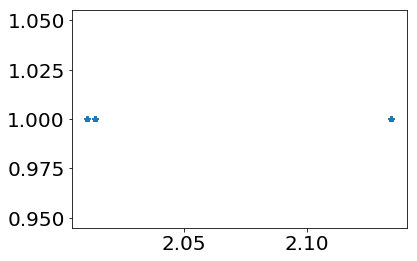

2.010551801347587 [1]
2.0138844979292 [1]
2.1345500728632265 [1]




133
1000


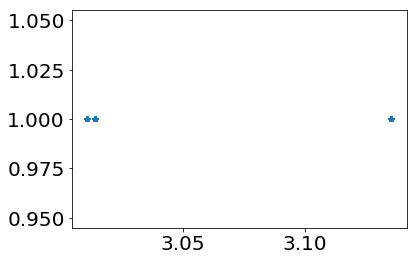

3.010560311594871 [1]
3.0139190913580145 [1]
3.1353880877098192 [1]




210
1000


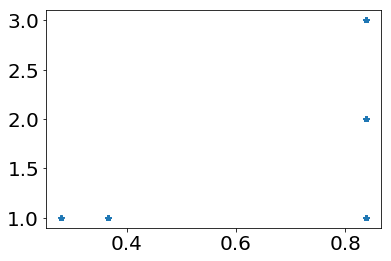

0.2805251723347533 [1]
0.3656932752376608 [1]
0.8372801534065999 [1]
0.8374173905871901 [2]
0.8375382823587131 [3]




220
1000


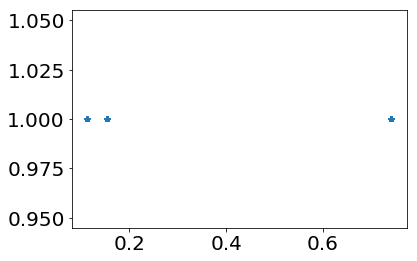

0.1129239568268123 [1]
0.1537346237513351 [1]
0.7415322001003282 [1]




221
1000


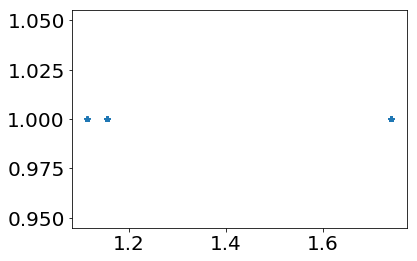

1.1129985866942824 [1]
1.1539819303912802 [1]
1.7417842640605787 [1]




230
1000


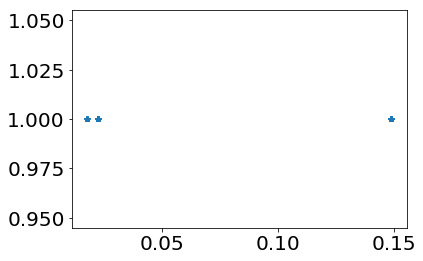

0.017396740706481187 [1]
0.022081519676891245 [1]
0.14902950618662406 [1]




231
1000


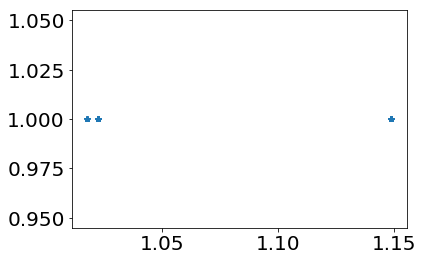

1.0173978270409734 [1]
1.0220851628953782 [1]
1.1490615420819144 [1]




232
1000


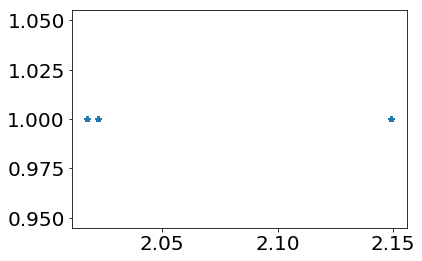

2.0173998195652536 [1]
2.0220926958012324 [1]
2.149234689996901 [1]




233
1000


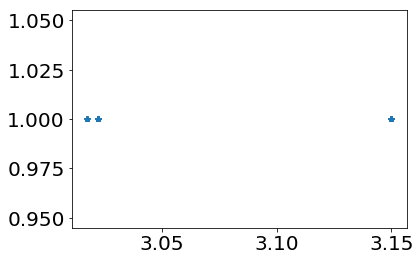

3.017412652369095 [1]
3.0221388139041663 [1]
3.1500736315369093 [1]




310
1000


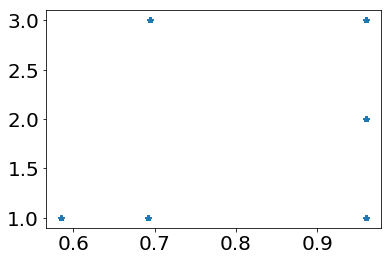

0.5851783819099665 [1]
0.692429350040215 [1]
0.6938344649705833 [3]
0.9595086412777 [1]
0.9595511841522693 [2]
0.9595830449142746 [3]




320
1000


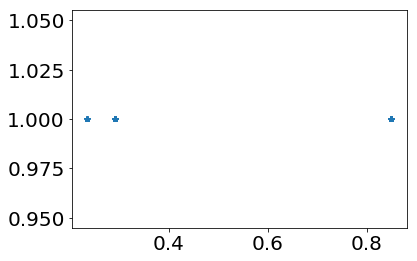

0.2355680484886808 [1]
0.2911096487772891 [1]
0.8497838760162907 [1]




321
1000


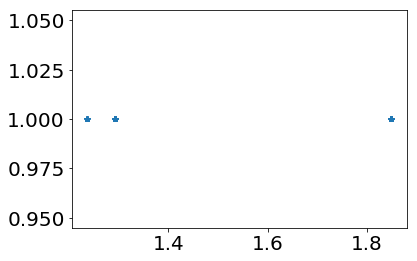

1.2356768881768694 [1]
1.29142888181638 [1]
1.849969531258248 [1]




330
1000


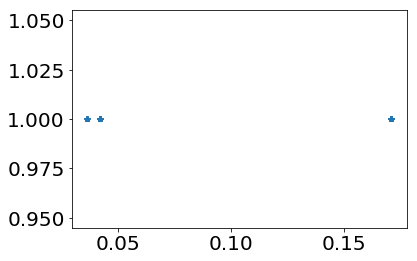

0.03629163357079377 [1]
0.04181532729915975 [1]
0.1707871333253358 [1]




331
1000


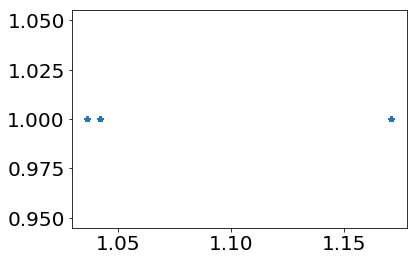

1.036292960237563 [1]
1.0418195070623972 [1]
1.1708187094330529 [1]




332
1000


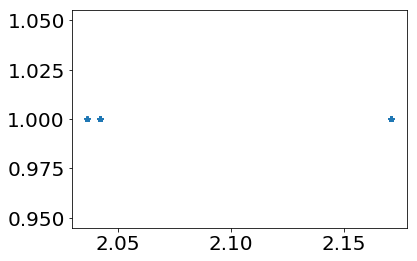

2.03629539350163 [1]
2.0418281488944734 [1]
2.1709893696173266 [1]




333
1000


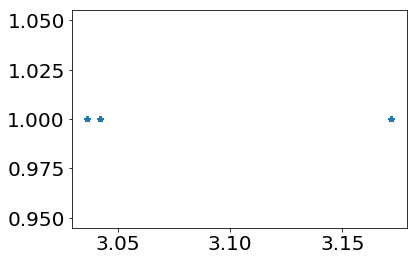

3.0363110626677616 [1]
3.0418810426263714 [1]
3.171816201153232 [1]






In [33]:
for el in xun_ok:
    inds = np.argwhere(df['UHV'].values==el)[:,0]
    print el
    print len(inds)
    plt.plot(df['UH'].values[inds],y[inds],'*')
    plt.show()
    for el2 in np.unique(df['UH'].values[inds]):
        inds2 = np.argwhere(el2==df['UH'].values[inds])
        print el2,np.unique(y[inds][inds2])
    print '\n\n\n'

In [34]:
tmp = df['UH']
for i in [3,2,1]:
    inds = np.argwhere(tmp>i)[:,0]
    tmp[inds] = tmp[inds]-i

/home/madeline/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


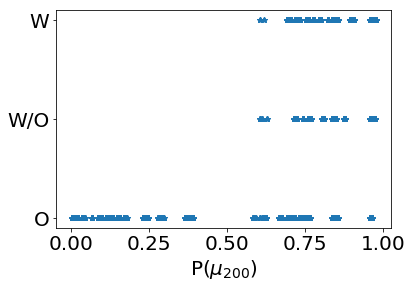

In [35]:
plt.plot(tmp,y,'*')
plt.xlabel("P($\mu_{200}$)")
plt.yticks([1,2,3],['O','W/O','W'])
plt.show()

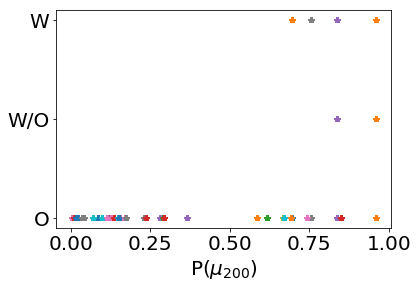

In [36]:
xf,yf=[],[]
for el in xun_ok:
    inds = np.argwhere(df['UHV'].values==el)[:,0]
    plt.plot(tmp[inds],y[inds],'*')
    for i in inds:
        xf+=[tmp[i]]
        yf+=[y[i]]
plt.xlabel("P($\mu_{200}$)")
plt.yticks([1,2,3],['O','W/O','W'])
plt.show()

In [37]:
xf=np.array(xf)
yf=np.array(yf)
inds= np.argwhere(yf==1)[:,0]
omin=np.min(xf[inds])
omax=np.max(xf[inds])
inds= np.argwhere(yf==2)[:,0]
womin=np.min(xf[inds])
womax=np.max(xf[inds])
inds= np.argwhere(yf==3)[:,0]
wmin=np.min(xf[inds])
wmax=np.max(xf[inds])

In [38]:
omin,omax,womin,womax,wmin,wmax

(0.002433984465199665,
 0.9595086412777,
 0.8374173905871901,
 0.9595511841522693,
 0.6938344649705833,
 0.9595830449142746)

Text(0.5,0,'P($\\mu_{200}$)')

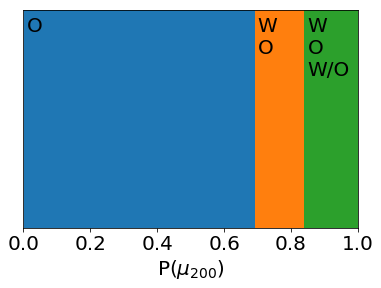

In [39]:
plt.fill_between([omin,omax],0,1)
plt.fill_between([wmin,wmax],0,1)
plt.fill_between([womin,1],0,1)

plt.text(0.01,0.9,'O')
plt.text(0.7,0.8,'W\nO')
plt.text(0.85,0.7,'W\nO\nW/O')
plt.xlim(0,1)
plt.ylim(0,1)
plt.yticks([])
plt.xlabel("P($\mu_{200}$)")